In [8]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import math

# Reading the train data.

In [9]:
df = pd.read_csv('train.csv')

In [10]:
df

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,0,1,-1999 June 12,3:14:51,NaN,-49456,NaN,T,NaN,NaN,6.0N,33.3W,NaN,344,247,06m37s
1,1,2,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,2,3,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,3,4,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,4,5,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,9513,9514,2002 December 4,7:32:16,64.0,36,142.0,T,-0.3020,1.0244,39.5S,59.6E,72.0,16,87,02m04s
9514,9514,9515,2003 May 31,4:09:22,64.0,42,147.0,An,0.9960,0.9384,66.6N,24.5W,3.0,35,-,03m37s
9515,9515,9516,2003 November 23,22:50:22,64.0,48,152.0,T,-0.9638,1.0379,72.7S,88.4E,15.0,111,495,01m57s
9516,9516,9517,2004 April 19,13:35:05,65.0,53,119.0,P,-1.1335,0.7367,61.6S,44.3E,0.0,295,NaN,NaN


# Reading the test set data.

In [11]:
test = pd.read_csv('test.csv')

In [12]:
test

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,9518,9519,2005 April 8,20:36:51,65.0,65,129.0,H,-0.3473,1.0074,10.6S,119.0W,70.0,332,27,00m42s
1,9519,9520,2005 October 3,10:32:47,65.0,71,134.0,A,0.3306,0.9576,12.9N,28.7E,71.0,209,162,04m32s
2,9520,9521,2006 March 29,10:12:23,65.0,77,139.0,T,0.3843,1.0515,23.2N,16.7E,67.0,149,184,04m07s
3,9521,9522,2006 September 22,11:41:16,65.0,83,144.0,A,-0.4062,0.9352,20.6S,9.1W,66.0,31,261,07m09s
4,9522,9523,2007 March 19,2:32:57,65.0,89,149.0,P,1.0728,0.8756,61.0N,55.5E,0.0,92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,11893,11894,2998 December 10,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,NaN,NaN
2376,11894,11895,2999 May 6,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s
2377,11895,11896,2999 October 30,9:34:33,4420.0,12366,159.0,A-,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-
2378,11896,11897,3000 April 26,14:18:06,4424.0,12372,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s


In [13]:
test_big = test.copy()  #shallow copy

In [14]:
test_big

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,9518,9519,2005 April 8,20:36:51,65.0,65,129.0,H,-0.3473,1.0074,10.6S,119.0W,70.0,332,27,00m42s
1,9519,9520,2005 October 3,10:32:47,65.0,71,134.0,A,0.3306,0.9576,12.9N,28.7E,71.0,209,162,04m32s
2,9520,9521,2006 March 29,10:12:23,65.0,77,139.0,T,0.3843,1.0515,23.2N,16.7E,67.0,149,184,04m07s
3,9521,9522,2006 September 22,11:41:16,65.0,83,144.0,A,-0.4062,0.9352,20.6S,9.1W,66.0,31,261,07m09s
4,9522,9523,2007 March 19,2:32:57,65.0,89,149.0,P,1.0728,0.8756,61.0N,55.5E,0.0,92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,11893,11894,2998 December 10,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,NaN,NaN
2376,11894,11895,2999 May 6,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s
2377,11895,11896,2999 October 30,9:34:33,4420.0,12366,159.0,A-,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-
2378,11896,11897,3000 April 26,14:18:06,4424.0,12372,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9518 entries, 0 to 9517
Data columns (total 16 columns):
Unnamed: 0           9518 non-null int64
Catalog Number       9518 non-null int64
Calendar Date        9518 non-null object
Eclipse Time         9518 non-null object
Delta T (s)          9498 non-null float64
Lunation Number      9518 non-null int64
Saros Number         9508 non-null float64
Eclipse Type         9518 non-null object
Gamma                9502 non-null float64
Eclipse Magnitude    9494 non-null float64
Latitude             9518 non-null object
Longitude            9518 non-null object
Sun Altitude         9504 non-null float64
Sun Azimuth          9518 non-null int64
Path Width (km)      6163 non-null object
Central Duration     6163 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 1.2+ MB


# Checking for NULL values.

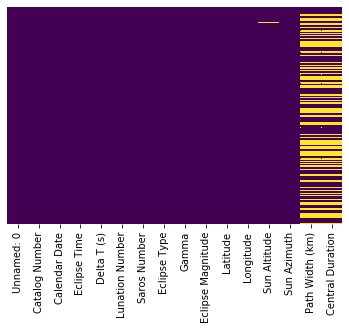

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #train set.

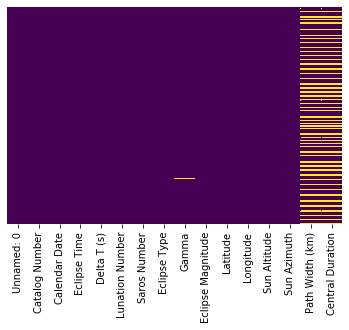

In [17]:
sns.heatmap(test_big.isnull(),yticklabels=False,cbar=False,cmap='viridis')   #train data.

#  Data set Cleaning.

###  Unique column.

In [18]:
print(df['Catalog Number'].nunique())
df.drop(columns=['Catalog Number'], inplace=True)
test.drop(columns=['Catalog Number'], inplace=True)

9518


In [19]:
print(df['Unnamed: 0'].nunique())
df.drop(columns=['Unnamed: 0'], inplace=True)
test.drop(columns=['Unnamed: 0'], inplace=True)

9518


In [20]:
print(df['Lunation Number'].nunique())
df.drop(columns=['Lunation Number'], inplace=True)
test.drop(columns=['Lunation Number'], inplace=True)

9518


In [21]:
df['Eclipse Time'].nunique()
df.drop(columns=['Eclipse Time'], inplace=True)
test.drop(columns=['Eclipse Time'], inplace=True)

In [22]:
# we have dropped here.

In [23]:
f = {'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June': 6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}


f1 = {'Jan':1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun': 6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}


#if it is present in the either format we will change it into the date time format.


def to_date(s):
    s = s.split()
    if len(s) == 1:
        l =  s[0].split('-')
        l[1] = str(f1[l[1]])
        return l[0]+':'+l[1]+':'+l[2]
    #print(s)
    s[1] = str(f[s[1]])
    return s[0]+':'+s[1]+':'+s[2]

In [24]:
df['Calendar Date'] = df['Calendar Date'].apply(lambda x:to_date(x))
test['Calendar Date'] = test['Calendar Date'].apply(lambda x:to_date(x))

In [25]:
test

,Calendar Date,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,2005:4:8,65.0,129.0,H,-0.3473,1.0074,10.6S,119.0W,70.0,332,27,00m42s
1,2005:10:3,65.0,134.0,A,0.3306,0.9576,12.9N,28.7E,71.0,209,162,04m32s
2,2006:3:29,65.0,139.0,T,0.3843,1.0515,23.2N,16.7E,67.0,149,184,04m07s
3,2006:9:22,65.0,144.0,A,-0.4062,0.9352,20.6S,9.1W,66.0,31,261,07m09s
4,2007:3:19,65.0,149.0,P,1.0728,0.8756,61.0N,55.5E,0.0,92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2375,2998:12:10,4414.0,187.0,P,1.2838,0.4773,67.2N,145.0E,0.0,179,NaN,NaN
2376,2999:5:6,4417.0,154.0,T,0.8388,1.0566,71.5N,177.3E,33.0,146,345,03m25s
2377,2999:10:30,4420.0,159.0,A-,-1.0023,0.9586,70.9S,84.7W,0.0,137,-,-
2378,3000:4:26,4424.0,164.0,T,0.1310,1.0222,21.1N,18.4W,82.0,166,76,02m11s


In [26]:
def to_day_number(s):
    l = s.split(':')
    year = int(l[0])
    month = int(l[1])
    day = int(l[2])
    if month == 1 or month == 2:
        yearp = year - 1
        monthp = month + 12
    else:
        yearp = year
        monthp = month 
    #this checks where we are in relation to October 15, 1582, the beginning of the Gregorian calendar.
    if ((year < 1582) or
        (year == 1582 and month < 10) or
        (year == 1582 and month == 10 and day < 15)):
        #before start of Gregorian calendar
        B = 0
    else:
        #after start of Gregorian calendar
        A = math.trunc(yearp / 100.)
        B = 2 - A + math.trunc(A / 4.)
        
    if yearp < 0:
        C = math.trunc((365.25 * yearp) - 0.75)
    else:
        C = math.trunc(365.25 * yearp)
        
    D = math.trunc(30.6001 * (monthp + 1))  
    jd = B + C + D + day + 1720994.5
    return jd

In [27]:
df

,Calendar Date,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,-1999:6:12,NaN,NaN,T,NaN,NaN,6.0N,33.3W,NaN,344,247,06m37s
1,-1999:12:5,46426.0,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,-1998:6:1,46415.0,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,-1998:11:25,46403.0,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,-1997:4:22,46393.0,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9513,2002:12:4,64.0,142.0,T,-0.3020,1.0244,39.5S,59.6E,72.0,16,87,02m04s
9514,2003:5:31,64.0,147.0,An,0.9960,0.9384,66.6N,24.5W,3.0,35,-,03m37s
9515,2003:11:23,64.0,152.0,T,-0.9638,1.0379,72.7S,88.4E,15.0,111,495,01m57s
9516,2004:4:19,65.0,119.0,P,-1.1335,0.7367,61.6S,44.3E,0.0,295,NaN,NaN


In [28]:
df['Time'] = df['Calendar Date'].apply(lambda x:to_day_number(x))
test['Time'] = test['Calendar Date'].apply(lambda x:to_day_number(x))

In [29]:
df['Calendar Date'].nunique()
df.drop(columns=['Calendar Date'], inplace=True)
test.drop(columns=['Calendar Date'], inplace=True)

In [30]:
#as we have the julian date.

In [31]:
df['Diff'] = df['Time'].diff()
test['Diff'] = test['Time'].diff()

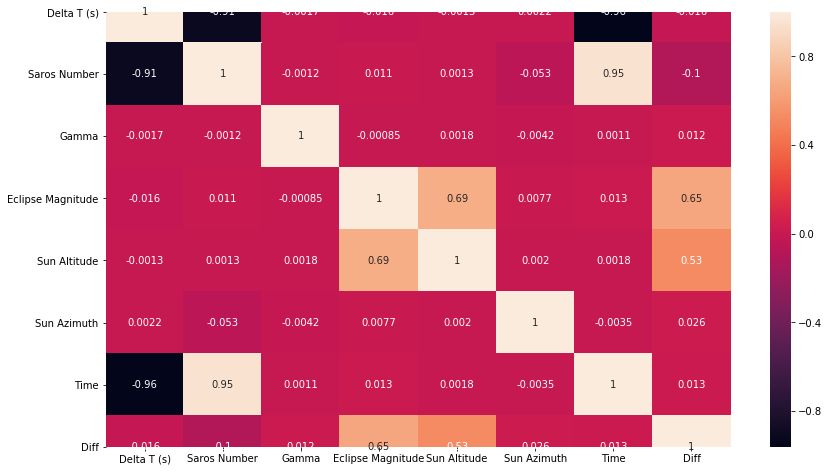

In [32]:
corr=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

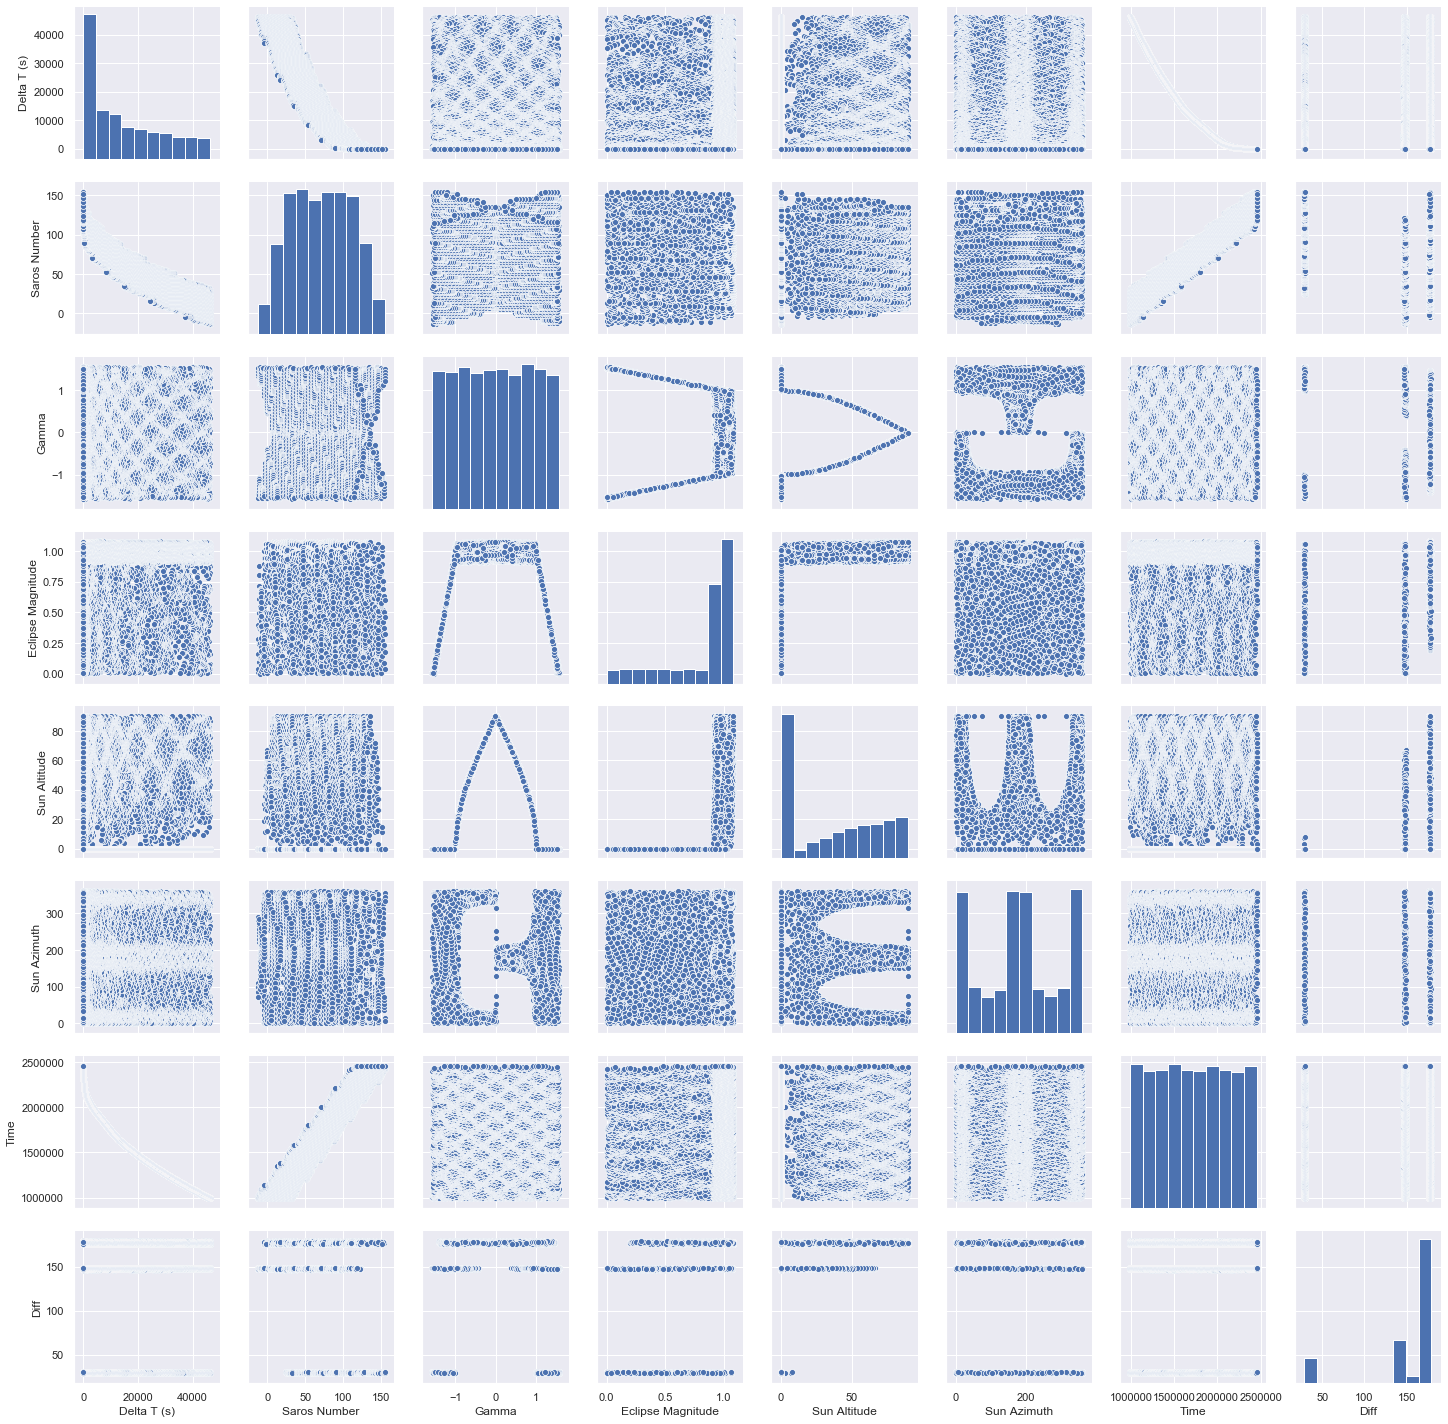

In [33]:
sns.set()
sns.pairplot(df)

In [34]:
#These are highly corelational data.

#Delta T (s), Saros Number
#Delta T (s), Time
#Saros Number, Time

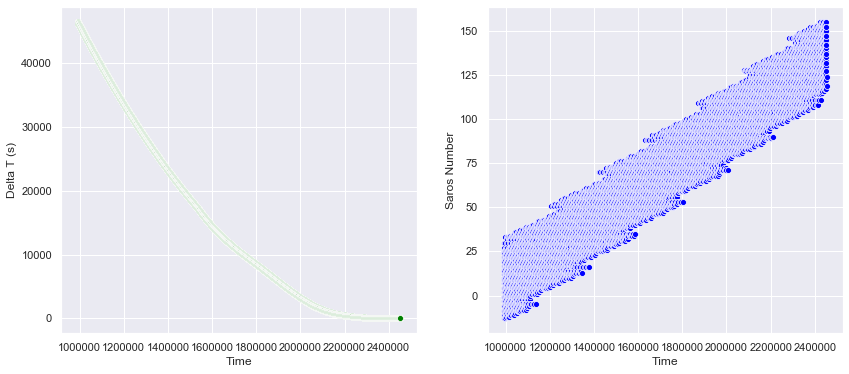

In [35]:
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)

sns.scatterplot(df['Time'], df['Delta T (s)'],ax = ax[0][0],color='green')

sns.scatterplot(df['Time'], df['Saros Number'],ax = ax[0][1],color='blue')

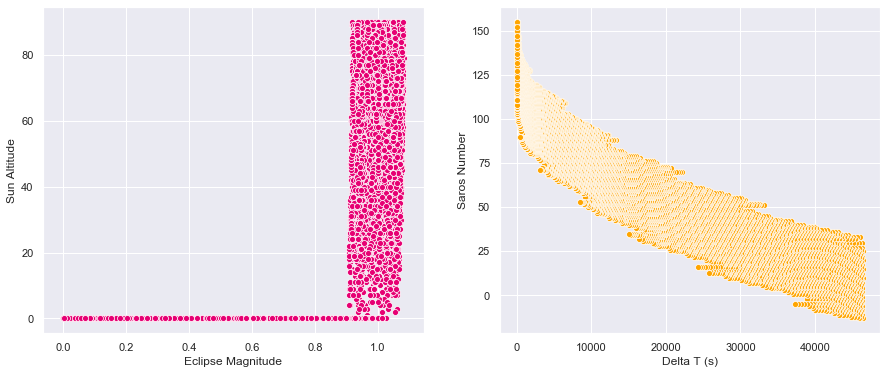

In [36]:
fig,ax=plt.subplots(1,2,figsize=(15,6),squeeze=False)
sns.scatterplot(df['Eclipse Magnitude'], df['Sun Altitude'],color='#e60073', ax=ax[0][0])
sns.scatterplot(df['Delta T (s)'], df['Saros Number'],color='orange',ax=ax[0][1])

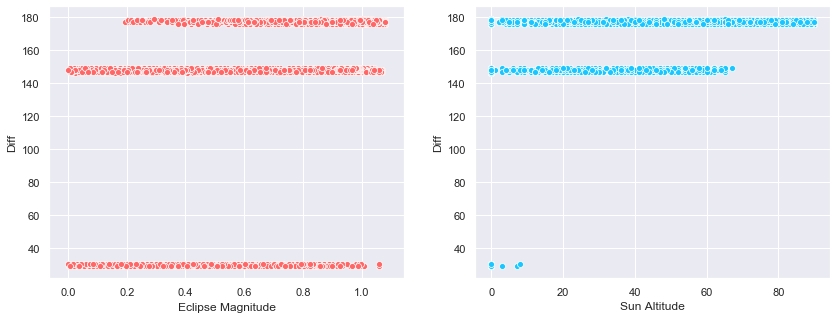

In [37]:
fig,ax=plt.subplots(1,2,figsize=(14,5),squeeze=False)
sns.scatterplot( df['Eclipse Magnitude'],df['Diff'],ax = ax[0][0],color='#ff6666')
sns.scatterplot(df['Sun Altitude'],df['Diff'],ax = ax[0][1],color='#1ac6ff')

In [38]:
df1 = df.iloc[1:]
df1

,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time,Diff
1,46426.0,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s,991261.5,176.0
2,46415.0,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s,991439.5,178.0
3,46403.0,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s,991616.5,177.0
4,46393.0,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,NaN,NaN,991764.5,148.0
5,46391.0,25.0,P,1.3253,0.4035,61.7N,151.7W,0.0,55,NaN,NaN,991794.5,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,64.0,142.0,T,-0.3020,1.0244,39.5S,59.6E,72.0,16,87,02m04s,2452612.5,177.0
9514,64.0,147.0,An,0.9960,0.9384,66.6N,24.5W,3.0,35,-,03m37s,2452790.5,178.0
9515,64.0,152.0,T,-0.9638,1.0379,72.7S,88.4E,15.0,111,495,01m57s,2452966.5,176.0
9516,65.0,119.0,P,-1.1335,0.7367,61.6S,44.3E,0.0,295,NaN,NaN,2453114.5,148.0


Unique Eclipse Type =  ['T' 'A' 'P' 'Pb' 'H' 'Pe' 'A+' 'H3' 'Hm' 'An' 'H2' 'Tm' 'Am' 'T+' 'A-'
 'T-' 'As' 'Tn' 'Ts']
Eclipse Type
Tm    177
Am    177
Hm    176
H3    176
H     175
H2    175
T     174
A     173
As    170
An    168
T-    165
A-    164
A+    163
T+    154
Pe    147
Tn    144
Ts    137
P     119
Pb     29
Name: Diff, dtype: int64


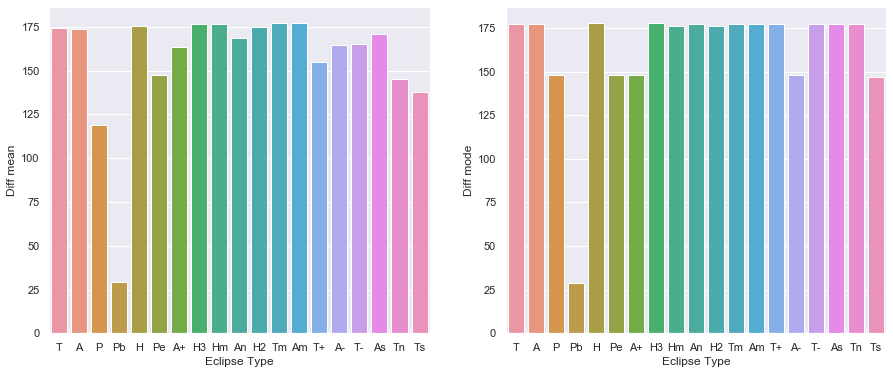

In [39]:
sns.set_palette('CMRmap')
print("Unique Eclipse Type = ",df['Eclipse Type'].unique())
print(df.groupby('Eclipse Type')['Diff'].mean().apply(int).sort_values(ascending=False))
x=pd.DataFrame()
x['Eclipse Type'] = df['Eclipse Type']
x['Diff'] = df['Diff']
x['Diff mode'] = x['Eclipse Type'].map(x.groupby('Eclipse Type')['Diff'].apply(lambda y: list(y.mode())[0])) 
x['Diff mean'] = x['Eclipse Type'].map(x.groupby('Eclipse Type')['Diff'].mean())
fig,ax=plt.subplots(1,2,figsize=(15,6),squeeze=False)
sns.barplot(x['Eclipse Type'],x['Diff mean'],ax=ax[0][0])
sns.barplot(x['Eclipse Type'],x['Diff mode'],ax=ax[0][1])

In [40]:
x = pd.DataFrame()
type_dict1 = dict()
type_dict1 =  (df.groupby('Eclipse Type')['Diff'].mean()).to_dict()
x['Eclipse Type']=df['Eclipse Type']
x['Eclipse Type'] = x['Eclipse Type'].map(type_dict1)
x['Eclipse Type'].mean()

153.64373904968693

In [41]:
df.corr()

,Delta T (s),Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.909183,-0.001723,-0.015550,-0.001337,0.002244,-0.962003,-0.015799
Saros Number,-0.909183,1.000000,-0.001173,0.011316,0.001339,-0.052533,0.947116,-0.101939
Gamma,-0.001723,-0.001173,1.000000,-0.000850,0.001777,-0.004172,0.001106,0.012282
Eclipse Magnitude,-0.015550,0.011316,-0.000850,1.000000,0.692768,0.007746,0.013026,0.651991
Sun Altitude,-0.001337,0.001339,0.001777,0.692768,1.000000,0.002026,0.001762,0.525735
Sun Azimuth,0.002244,-0.052533,-0.004172,0.007746,0.002026,1.000000,-0.003455,0.025862
Time,-0.962003,0.947116,0.001106,0.013026,0.001762,-0.003455,1.000000,0.013382
Diff,-0.015799,-0.101939,0.012282,0.651991,0.525735,0.025862,0.013382,1.000000


(array([1080.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1864.,  323.,    0.,    0.,    0., 6250.]),
 array([ 29.,  35.,  41.,  47.,  53.,  59.,  65.,  71.,  77.,  83.,  89.,
         95., 101., 107., 113., 119., 125., 131., 137., 143., 149., 155.,
        161., 167., 173., 179.]),
 <a list of 25 Patch objects>)

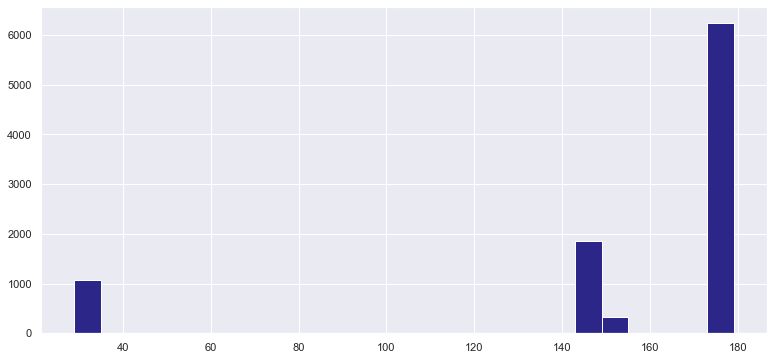

In [42]:
fig,ax=plt.subplots(1,1,figsize=(13,6),squeeze=False)
plt.hist(df['Diff'],bins=25)

#Time interval between consecutive eclipses(Diff column) Analysis

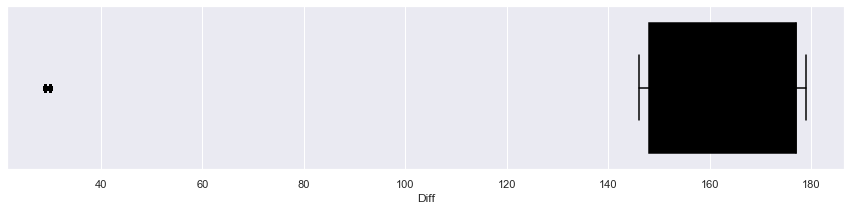

In [43]:
fig,ax=plt.subplots(figsize=(15,3))
sns.boxplot(x=df['Diff'],color='black')

In [44]:
df['Saros Number'].fillna(df['Saros Number'].mode()[0], inplace=True)
test['Saros Number'].fillna(df['Saros Number'].mode()[0], inplace=True)

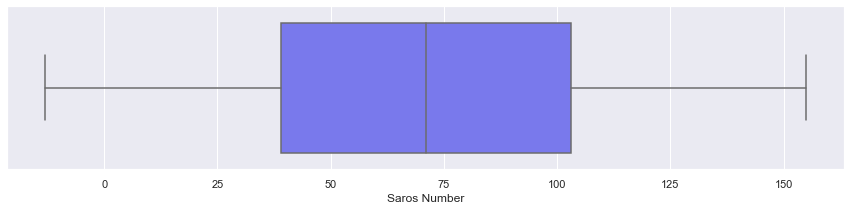

In [45]:
fig,ax=plt.subplots(figsize=(15,3))
sns.boxplot(x=df['Saros Number'],color='#6666ff')

In [46]:
df.corr()

,Delta T (s),Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.909183,-0.001723,-0.015550,-0.001337,0.002244,-0.962003,-0.015799
Saros Number,-0.909183,1.000000,-0.001223,0.011212,0.001400,-0.052702,0.946215,-0.101802
Gamma,-0.001723,-0.001223,1.000000,-0.000850,0.001777,-0.004172,0.001106,0.012282
Eclipse Magnitude,-0.015550,0.011212,-0.000850,1.000000,0.692768,0.007746,0.013026,0.651991
Sun Altitude,-0.001337,0.001400,0.001777,0.692768,1.000000,0.002026,0.001762,0.525735
Sun Azimuth,0.002244,-0.052702,-0.004172,0.007746,0.002026,1.000000,-0.003455,0.025862
Time,-0.962003,0.946215,0.001106,0.013026,0.001762,-0.003455,1.000000,0.013382
Diff,-0.015799,-0.101802,0.012282,0.651991,0.525735,0.025862,0.013382,1.000000


In [47]:
df[df['Delta T (s)'].isnull()]

,Delta T (s),Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time,Diff
0,NaN,34.0,T,NaN,NaN,6.0N,33.3W,NaN,344,247,06m37s,991085.5,NaN
500,NaN,12.0,A,-0.1047,0.9509,29.0S,73.7W,84.0,358,181,05m49s,1065089.5,179.0
1000,NaN,34.0,A,0.7568,0.9516,65.7N,23.0E,41.0,138,271,03m51s,1140834.5,177.0
1500,NaN,10.0,P,1.1072,0.8055,64.3N,136.3W,0.0,205,NaN,NaN,1221748.5,148.0
2000,NaN,34.0,A,-0.6788,NaN,19.9S,83.6E,47.0,1,189,04m46s,1296106.5,178.0
2500,NaN,56.0,P,-1.1814,0.6476,62.5S,59.6W,0.0,135,NaN,NaN,1372206.5,177.0
3000,NaN,34.0,P,NaN,0.4652,64.0N,147.3E,0.0,209,NaN,NaN,1452943.5,148.0
3500,NaN,63.0,T,0.5735,1.0387,18.0N,102.1W,NaN,192,158,03m36s,1525233.5,176.0
4000,NaN,34.0,P,1.1063,NaN,68.1N,90.5E,0.0,346,NaN,NaN,1602190.5,29.0
4500,NaN,84.0,P,-1.1974,0.6312,68.4S,59.1E,0.0,344,NaN,NaN,1681391.5,29.0


In [48]:
print(df['Delta T (s)'].mode())
print(np.mean(df['Delta T (s)']))

0    12.0
dtype: float64
14739.58780795957


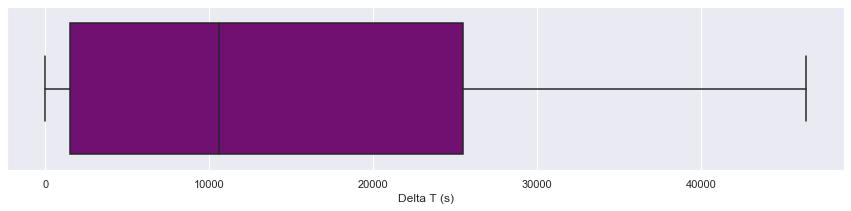

In [49]:
fig,ax=plt.subplots(figsize=(15,3))
sns.boxplot(x=df['Delta T (s)'],color='purple')

(array([2657.,  644.,  571.,  547.,  573.,  442.,  357.,  366.,  365.,
         314.,  295.,  306.,  304.,  278.,  254.,  241.,  244.,  257.,
         250.,  233.]),
 array([-6.00000e+00,  2.31560e+03,  4.63720e+03,  6.95880e+03,
         9.28040e+03,  1.16020e+04,  1.39236e+04,  1.62452e+04,
         1.85668e+04,  2.08884e+04,  2.32100e+04,  2.55316e+04,
         2.78532e+04,  3.01748e+04,  3.24964e+04,  3.48180e+04,
         3.71396e+04,  3.94612e+04,  4.17828e+04,  4.41044e+04,
         4.64260e+04]),
 <a list of 20 Patch objects>)

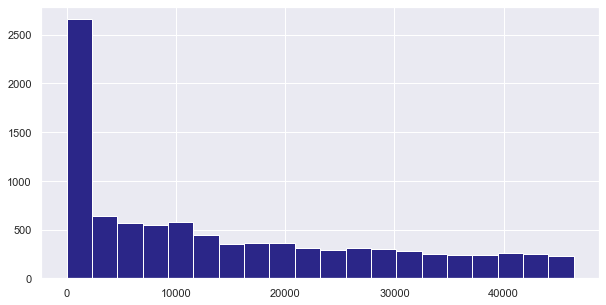

In [50]:
fig,ax=plt.subplots(figsize=(10,5))
plt.hist(df['Delta T (s)'], bins=20)

In [51]:
#mode imputation.

df['Delta T (s)'].fillna(df['Delta T (s)'].mode()[0], inplace=True)
test['Delta T (s)'].fillna(df['Delta T (s)'].mode()[0], inplace=True)

In [52]:
df.corr()

,Delta T (s),Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.906255,-0.001860,-0.015961,-0.001226,0.001346,-0.959770,-0.015718
Saros Number,-0.906255,1.000000,-0.001223,0.011212,0.001400,-0.052702,0.946215,-0.101802
Gamma,-0.001860,-0.001223,1.000000,-0.000850,0.001777,-0.004172,0.001106,0.012282
Eclipse Magnitude,-0.015961,0.011212,-0.000850,1.000000,0.692768,0.007746,0.013026,0.651991
Sun Altitude,-0.001226,0.001400,0.001777,0.692768,1.000000,0.002026,0.001762,0.525735
Sun Azimuth,0.001346,-0.052702,-0.004172,0.007746,0.002026,1.000000,-0.003455,0.025862
Time,-0.959770,0.946215,0.001106,0.013026,0.001762,-0.003455,1.000000,0.013382
Diff,-0.015718,-0.101802,0.012282,0.651991,0.525735,0.025862,0.013382,1.000000


(array([400., 548., 460., 478., 490., 485., 486., 449., 477., 476., 484.,
        473., 459., 458., 508., 488., 449., 514., 455., 465.]),
 array([-1.569 , -1.4123, -1.2556, -1.0989, -0.9422, -0.7855, -0.6288,
        -0.4721, -0.3154, -0.1587, -0.002 ,  0.1547,  0.3114,  0.4681,
         0.6248,  0.7815,  0.9382,  1.0949,  1.2516,  1.4083,  1.565 ]),
 <a list of 20 Patch objects>)

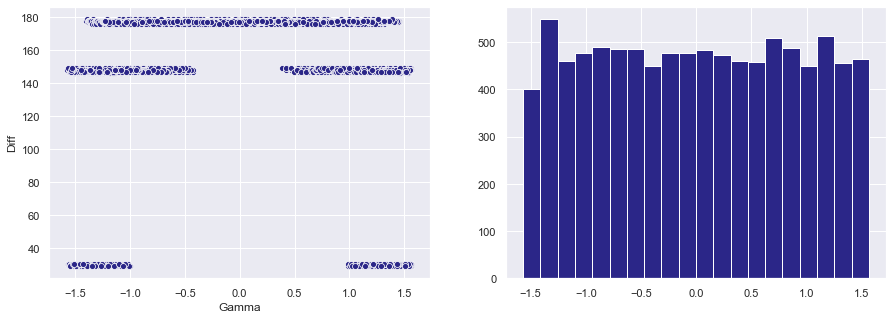

In [53]:
fig,ax=plt.subplots(1,2,figsize=(15,5),squeeze=False)
sns.scatterplot(df['Gamma'],df['Diff'],ax=ax[0][0])
plt.hist(df['Gamma'], bins=20)

In [54]:
len(df['Gamma'].unique())

8122

In [55]:
df.drop(columns=['Gamma'],inplace=True)
test.drop(columns=['Gamma'],inplace=True)

In [56]:
df

,Delta T (s),Saros Number,Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Time,Diff
0,12.0,34.0,T,NaN,6.0N,33.3W,NaN,344,247,06m37s,991085.5,NaN
1,46426.0,10.0,A,0.9382,32.9S,10.8E,76.0,21,236,06m44s,991261.5,176.0
2,46415.0,15.0,T,1.0284,46.2N,83.4E,60.0,151,111,02m15s,991439.5,178.0
3,46403.0,20.0,A,0.9806,67.8S,143.8W,25.0,74,162,01m14s,991616.5,177.0
4,46393.0,-13.0,P,0.1611,60.6S,106.4W,0.0,281,NaN,NaN,991764.5,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9513,64.0,142.0,T,1.0244,39.5S,59.6E,72.0,16,87,02m04s,2452612.5,177.0
9514,64.0,147.0,An,0.9384,66.6N,24.5W,3.0,35,-,03m37s,2452790.5,178.0
9515,64.0,152.0,T,1.0379,72.7S,88.4E,15.0,111,495,01m57s,2452966.5,176.0
9516,65.0,119.0,P,0.7367,61.6S,44.3E,0.0,295,NaN,NaN,2453114.5,148.0


(array([ 369.,  388.,  381.,  396.,  374.,  370.,  386.,  360., 2629.,
        3841.]),
 array([0.     , 0.10813, 0.21626, 0.32439, 0.43252, 0.54065, 0.64878,
        0.75691, 0.86504, 0.97317, 1.0813 ]),
 <a list of 10 Patch objects>)

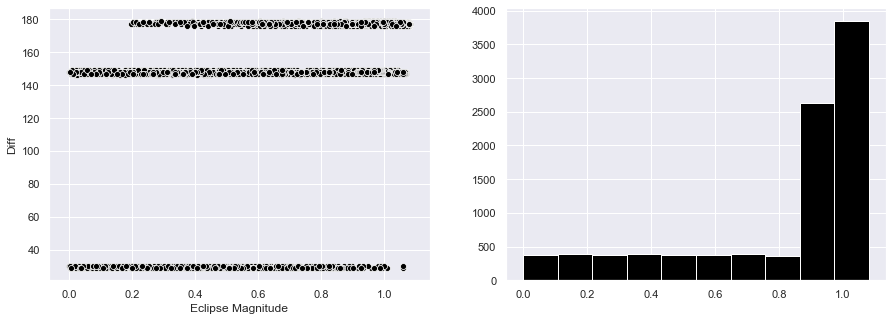

In [57]:
fig,ax=plt.subplots(1,2,figsize=(15,5),squeeze=False)
sns.scatterplot(df['Eclipse Magnitude'],df['Diff'],ax=ax[0][0],color='black')
plt.hist(df['Eclipse Magnitude'], bins=10,color='black')

In [58]:
print(np.mean(df['Eclipse Magnitude']))
print(df['Eclipse Magnitude'].mode())

0.8134463871919089
0    0.9481
dtype: float64


In [59]:
df['Eclipse Magnitude'].fillna(df['Eclipse Magnitude'].mode()[0], inplace=True)
test['Eclipse Magnitude'].fillna(df['Eclipse Magnitude'].mode()[0], inplace=True)

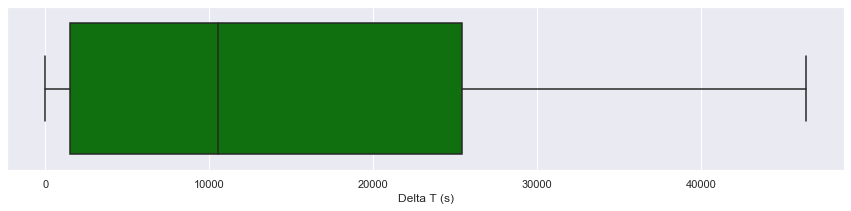

In [60]:
fig,ax=plt.subplots(figsize=(15,3))
sns.boxplot(x=df['Delta T (s)'],color='green')

In [61]:
df.corr()

,Delta T (s),Saros Number,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.906255,-0.016185,-0.001226,0.001346,-0.959770,-0.015718
Saros Number,-0.906255,1.000000,0.010923,0.001400,-0.052702,0.946215,-0.101802
Eclipse Magnitude,-0.016185,0.010923,1.000000,0.692087,0.007460,0.012940,0.651678
Sun Altitude,-0.001226,0.001400,0.692087,1.000000,0.002026,0.001762,0.525735
Sun Azimuth,0.001346,-0.052702,0.007460,0.002026,1.000000,-0.003455,0.025862
Time,-0.959770,0.946215,0.012940,0.001762,-0.003455,1.000000,0.013382
Diff,-0.015718,-0.101802,0.651678,0.525735,0.025862,0.013382,1.000000


In [62]:
print(df['Sun Altitude'].mode())
print(np.mean(df['Sun Altitude']))

0    0.0
dtype: float64
36.513468013468014


(array([3491.,  192.,  397.,  488.,  633.,  736.,  811.,  832.,  922.,
        1002.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

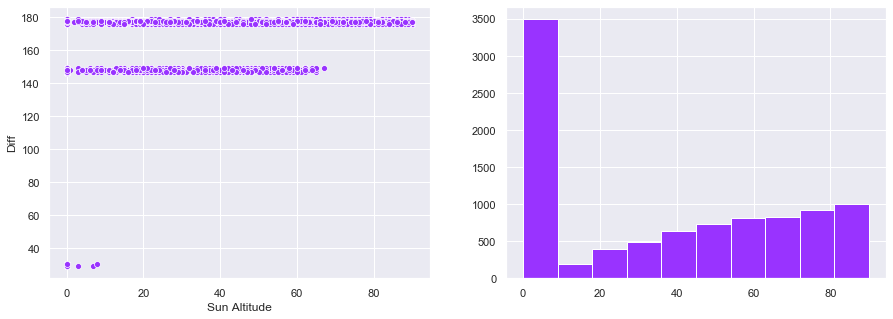

In [63]:
fig,ax=plt.subplots(1,2,figsize=(15,5),squeeze=False)
sns.scatterplot(df['Sun Altitude'],df['Diff'],ax=ax[0][0],color='#9933ff')
plt.hist(df['Sun Altitude'], bins=10,color='#9933ff')

In [64]:
df['Sun Altitude'].fillna(df['Sun Altitude'].mode()[0], inplace=True)
test['Sun Altitude'].fillna(df['Sun Altitude'].mode()[0], inplace=True)

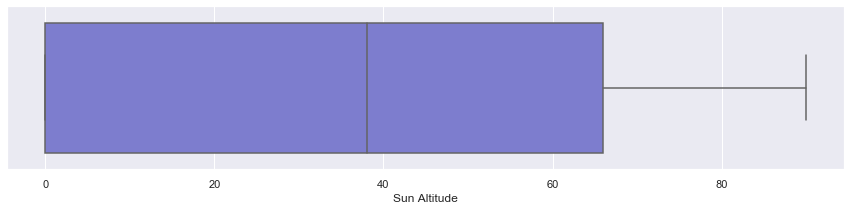

In [65]:
fig,ax=plt.subplots(figsize=(15,3))
sns.boxplot(x=df['Sun Altitude'],color='#7070db')

In [66]:
df.corr()

,Delta T (s),Saros Number,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.906255,-0.016185,-0.000822,0.001346,-0.959770,-0.015718
Saros Number,-0.906255,1.000000,0.010923,0.001611,-0.052702,0.946215,-0.101802
Eclipse Magnitude,-0.016185,0.010923,1.000000,0.690644,0.007460,0.012940,0.651678
Sun Altitude,-0.000822,0.001611,0.690644,1.000000,0.001672,0.001885,0.525112
Sun Azimuth,0.001346,-0.052702,0.007460,0.001672,1.000000,-0.003455,0.025862
Time,-0.959770,0.946215,0.012940,0.001885,-0.003455,1.000000,0.013382
Diff,-0.015718,-0.101802,0.651678,0.525112,0.025862,0.013382,1.000000


In [67]:
df['Path Width (km)'].isnull().sum()

3355

In [68]:
df.drop(columns=['Path Width (km)'],inplace=True)
test.drop(columns=['Path Width (km)'],inplace=True)

In [69]:
df

,Delta T (s),Saros Number,Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Central Duration,Time,Diff
0,12.0,34.0,T,0.9481,6.0N,33.3W,0.0,344,06m37s,991085.5,NaN
1,46426.0,10.0,A,0.9382,32.9S,10.8E,76.0,21,06m44s,991261.5,176.0
2,46415.0,15.0,T,1.0284,46.2N,83.4E,60.0,151,02m15s,991439.5,178.0
3,46403.0,20.0,A,0.9806,67.8S,143.8W,25.0,74,01m14s,991616.5,177.0
4,46393.0,-13.0,P,0.1611,60.6S,106.4W,0.0,281,NaN,991764.5,148.0
...,...,...,...,...,...,...,...,...,...,...,...
9513,64.0,142.0,T,1.0244,39.5S,59.6E,72.0,16,02m04s,2452612.5,177.0
9514,64.0,147.0,An,0.9384,66.6N,24.5W,3.0,35,03m37s,2452790.5,178.0
9515,64.0,152.0,T,1.0379,72.7S,88.4E,15.0,111,01m57s,2452966.5,176.0
9516,65.0,119.0,P,0.7367,61.6S,44.3E,0.0,295,NaN,2453114.5,148.0


In [70]:
df['Central Duration'].isnull().sum()

3355

In [71]:
df.drop(columns=['Central Duration'],inplace=True)
test.drop(columns=['Central Duration'],inplace=True)

In [72]:
df

,Delta T (s),Saros Number,Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Time,Diff
0,12.0,34.0,T,0.9481,6.0N,33.3W,0.0,344,991085.5,NaN
1,46426.0,10.0,A,0.9382,32.9S,10.8E,76.0,21,991261.5,176.0
2,46415.0,15.0,T,1.0284,46.2N,83.4E,60.0,151,991439.5,178.0
3,46403.0,20.0,A,0.9806,67.8S,143.8W,25.0,74,991616.5,177.0
4,46393.0,-13.0,P,0.1611,60.6S,106.4W,0.0,281,991764.5,148.0
...,...,...,...,...,...,...,...,...,...,...
9513,64.0,142.0,T,1.0244,39.5S,59.6E,72.0,16,2452612.5,177.0
9514,64.0,147.0,An,0.9384,66.6N,24.5W,3.0,35,2452790.5,178.0
9515,64.0,152.0,T,1.0379,72.7S,88.4E,15.0,111,2452966.5,176.0
9516,65.0,119.0,P,0.7367,61.6S,44.3E,0.0,295,2453114.5,148.0


In [73]:
df.drop(columns=['Longitude'],inplace=True)
test.drop(columns=['Longitude'],inplace=True)
df.drop(columns=['Latitude'],inplace=True)
test.drop(columns=['Latitude'],inplace=True)

In [74]:
df.corr()

,Delta T (s),Saros Number,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Time,Diff
Delta T (s),1.000000,-0.906255,-0.016185,-0.000822,0.001346,-0.959770,-0.015718
Saros Number,-0.906255,1.000000,0.010923,0.001611,-0.052702,0.946215,-0.101802
Eclipse Magnitude,-0.016185,0.010923,1.000000,0.690644,0.007460,0.012940,0.651678
Sun Altitude,-0.000822,0.001611,0.690644,1.000000,0.001672,0.001885,0.525112
Sun Azimuth,0.001346,-0.052702,0.007460,0.001672,1.000000,-0.003455,0.025862
Time,-0.959770,0.946215,0.012940,0.001885,-0.003455,1.000000,0.013382
Diff,-0.015718,-0.101802,0.651678,0.525112,0.025862,0.013382,1.000000


In [75]:
test1 = test[1:]
df1 = df[1:]

In [76]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
from collections import defaultdict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
import astropy.time
import dateutil.parser
import math
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [82]:
X_train = df[['Delta T (s)','Saros Number','Eclipse Type', 'Eclipse Magnitude','Sun Altitude', 'Sun Azimuth','Time']]
Y_train = df[['Diff']]
X_test = test1[['Delta T (s)','Saros Number','Eclipse Type', 'Eclipse Magnitude','Sun Altitude', 'Sun Azimuth','Time']]
Y_test = test1[['Diff']]

In [ ]:
def model_fit(model,X_train, Y_train):
    model = LinearRegression() 
    model.fit(X_train, Y_train)
    return model
lin_model = model_fit(LinearRegression,X_train, Y_train)

R2=list()
mse=list()
abse=list()
rm=list()
def scores_(model,X,Y):
    y_predict = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
    r2 = r2_score(Y, y_predict)
    print('R2 score is {}'.format(r2))
    print('Mean Absolute Error:', mean_absolute_error(Y, y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y, y_predict))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y, y_predict)))
    R2.append(r2)
    mse.append(mean_squared_error(Y, y_predict))
    abse.append(mean_absolute_error(Y, y_predict))
    rm.append(np.sqrt(mean_squared_error(Y, y_predict)))
score = scores_(lin_model, X_test, Y_test)